In [4]:
import pandas as pd

In [5]:
import descartes
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline


In [6]:
from missing_columns_pd import miss_cols

In [3]:
# pop_by_county = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\Iowa population by county from Iowa demographics.csv')

In [8]:
pop_per_zip_df = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\pop_per_zip_df.csv', dtype={'Zip_Code':str}, index_col=0)

In [9]:
pop_per_zip_df.head()

,Zip_Code,population_per_zip
0,50001,749.0
1,50002,1359.0
2,50003,7872.0
3,50005,1060.0
4,50006,1596.0


read in us shape file

In [10]:

us = gpd.read_file(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\tl_2020_us_zcta520.shp')

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [11]:
pd.set_option('display.max_columns', None)
us.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,35592,35592,B5,G6350,S,298552385,235989,+33.7427261,-088.0973903,"POLYGON ((-88.24735 33.65390, -88.24713 33.654..."
1,35616,35616,B5,G6350,S,559506992,41870756,+34.7395036,-088.0193814,"POLYGON ((-88.13997 34.58184, -88.13995 34.582..."
2,35621,35621,B5,G6350,S,117838488,409438,+34.3350314,-086.7270557,"POLYGON ((-86.81659 34.34960, -86.81649 34.349..."
3,35651,35651,B5,G6350,S,104521045,574316,+34.4609087,-087.4801507,"POLYGON ((-87.53087 34.42492, -87.53082 34.429..."
4,36010,36010,B5,G6350,S,335675180,236811,+31.6598950,-085.8128958,"POLYGON ((-85.95712 31.67744, -85.95676 31.677..."


In [12]:
us.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33791 entries, 0 to 33790
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZCTA5CE20   33791 non-null  object  
 1   GEOID20     33791 non-null  object  
 2   CLASSFP20   33791 non-null  object  
 3   MTFCC20     33791 non-null  object  
 4   FUNCSTAT20  33791 non-null  object  
 5   ALAND20     33791 non-null  int64   
 6   AWATER20    33791 non-null  int64   
 7   INTPTLAT20  33791 non-null  object  
 8   INTPTLON20  33791 non-null  object  
 9   geometry    33791 non-null  geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 2.6+ MB


In [13]:
type(us)

geopandas.geodataframe.GeoDataFrame

merge US census shape file with pop_per_zip_df

Note:  to create a geodataframe, the geodataframe must be on the left of the merge

In [14]:
iowa_pop_gdf = us.merge(pop_per_zip_df,how='inner',left_on='ZCTA5CE20', right_on='Zip_Code')

In [15]:
type(iowa_pop_gdf)

geopandas.geodataframe.GeoDataFrame

In [17]:
iowa_pop_gdf.shape

(934, 12)

In [31]:
iowa_pop_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 934 entries, 0 to 933
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ZCTA5CE20           934 non-null    object  
 1   GEOID20             934 non-null    object  
 2   CLASSFP20           934 non-null    object  
 3   MTFCC20             934 non-null    object  
 4   FUNCSTAT20          934 non-null    object  
 5   ALAND20             934 non-null    int64   
 6   AWATER20            934 non-null    int64   
 7   INTPTLAT20          934 non-null    object  
 8   INTPTLON20          934 non-null    object  
 9   geometry            934 non-null    geometry
 10  Zip_Code            934 non-null    object  
 11  population_per_zip  934 non-null    float64 
dtypes: float64(1), geometry(1), int64(2), object(8)
memory usage: 94.9+ KB


In [34]:
land_area_census = iowa_pop_gdf[['Zip_Code','ZCTA5CE20','ALAND20']]

In [36]:
land_area_census.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\land_area_census.csv')

In [35]:
type(land_area_census)

pandas.core.frame.DataFrame

In [16]:

iowa_pop_gdf.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,Zip_Code,population_per_zip
0,51640,51640,B5,G6350,S,298913924,4033670,+40.6262178,-095.6613422,"POLYGON ((-95.77470 40.57357, -95.77355 40.578...",51640,1660.0
1,52626,52626,B5,G6350,S,228312761,3985774,+40.6374551,-091.7255911,"POLYGON ((-91.86403 40.57529, -91.86398 40.575...",52626,1264.0
2,52542,52542,B5,G6350,S,121264799,151574,+40.6198504,-092.0562370,"POLYGON ((-92.15051 40.60549, -92.15050 40.608...",52542,298.0
3,52573,52573,B5,G6350,S,96683363,1381599,+40.6275690,-091.9288495,"POLYGON ((-92.02973 40.66824, -92.02972 40.671...",52573,193.0
4,51557,51557,B5,G6350,S,194969173,1901656,+41.7336445,-096.0063653,"POLYGON ((-96.13606 41.74169, -96.13438 41.741...",51557,828.0


C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


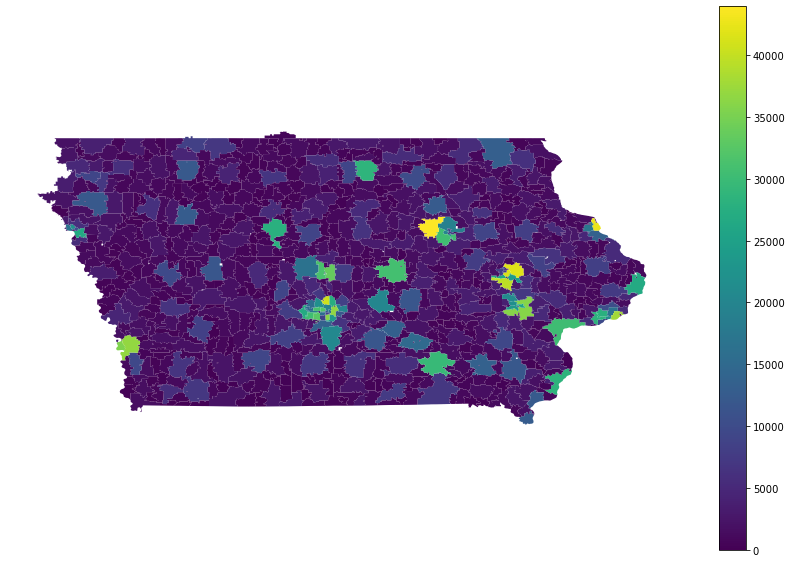

In [30]:
ax = iowa_pop_gdf.plot(column='population_per_zip',legend = True, figsize=(15, 10),
                      )
ax.set_axis_off(); # turns off axis labels

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


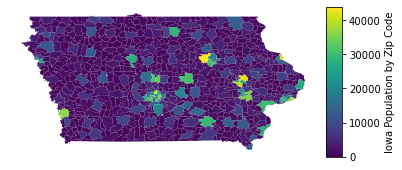

In [27]:
# cmap='RdBu',center=0,annot=True
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

mapit = iowa_pop_gdf.plot(column='population_per_zip', ax=ax, legend = True, cax=cax, figsize=(15, 10),
                      legend_kwds={'label': "Iowa Population by Zip Code",
                         }) #'orientation': "horizontal"
mapit.set_axis_off(); # turns off axis labels

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


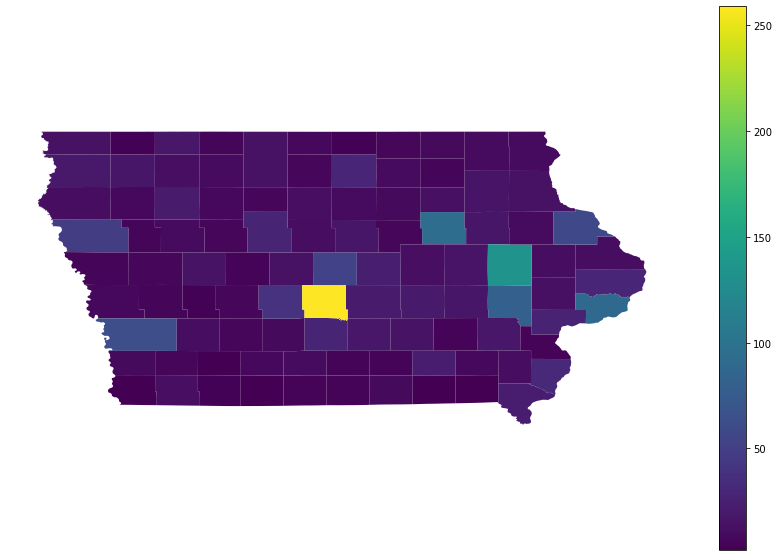

In [91]:
ax = iowa_pop_stores_gdf.plot(column='Store_Number',legend = True, figsize=(15, 10))
ax.set_axis_off(); # turns off axis labels

In [30]:
loc_gdf = gpd.GeoDataFrame(d, crs=iowa_pop_gdf.crs)
type(loc_gdf)
loc_gdf

,col1,geometry
0,Dyno's #53 / Sibley,POINT (-95.752119 43.397431)
1,Dyno's #40 / Spencer,POINT (-95.143701 43.12759)
2,Dyno's #29 / Emmetsburg,POINT (-94.681939 43.111913)
3,Dyno's #41 / Albert City,POINT (-94.953239 42.777449)
4,Double D Liquor Store,POINT (-91.473634 43.262114)
...,...,...
1785,Hy-Vee Food Store / Corning,POINT (-94.73259400000002 40.991872)
1786,Fareway Stores #073 / Council Bluffs,POINT (-95.81799900000001 41.280148)
1787,Casey's General Store #2924 / Marion,POINT (-91.553462 42.037621)
1788,Hiway 20 Liquor and Tobacco / Fort Dodge,POINT (-94.173816 42.501131)


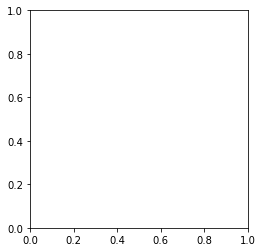

In [31]:
loc_gdf.plot(marker='*', markersize=5);
# locations_gpd.to_crs(iowa_pop_gdf)

In [ ]:
# iowa.head(3)
# iowa.info()